# **DS605: Fundamental of Machine Learning Project-3**  

---

# Hardik Bharvada - 202418010   
# Jash Virani - 202418061  
# Kashyap Shingala - 202418052
# Viraj Modi - 202418060

## **Problem Statement** : Solving Last-Mile Delivery using Clustering Techniques

## Data Scraping and Data Pre-Processing

We have scrapped the data from Kaggle [Zomato Delivery Operations Analytics Dataset](https://www.kaggle.com/datasets/saurabhbadole/zomato-delivery-operations-analytics-dataset).

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('/content/Zomato Dataset.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [44]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [45]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


So there are null values in many attributes like Delivery_person_Age, Delivery_person_Ratings, Time_Orderd and many more but since most of them are not revalent for our problem statement so they won't make a big difference and those who are we will deal with them using proper methods.

# Exploratory Data Analysis(EDA)

# Model

In [38]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [20]:
# Select relevant columns for clustering
columns_for_clustering = [
    "Delivery_location_latitude",
    "Delivery_location_longitude",
    "Time_taken (min)"
]
df_subset = df[columns_for_clustering]

In [21]:
# Step 1: Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_subset)

# Step 2: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [22]:
# Step 3: Apply PCA for dimensionality reduction
pca = PCA(0.95)
df_pca = pca.fit_transform(df_scaled)

# Number of components retained
print(f"Number of PCA components retained: {df_pca.shape[1]}")

Number of PCA components retained: 3


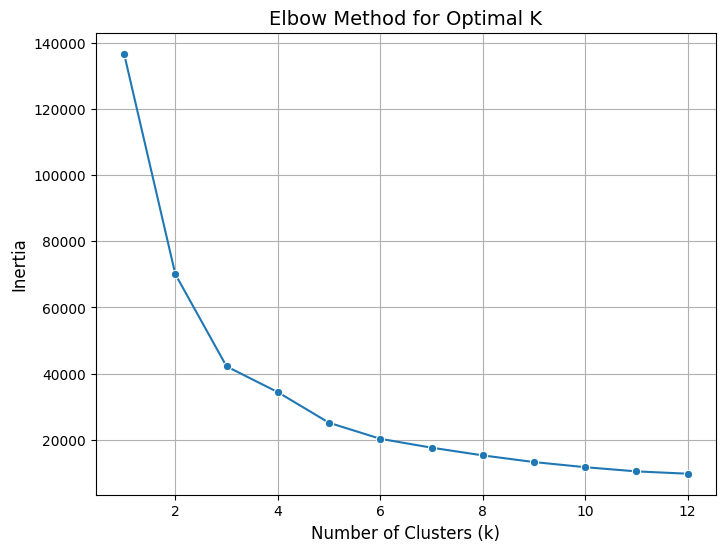

In [25]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_values = range(1, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=inertia, marker='o')
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.grid(True)
plt.show()


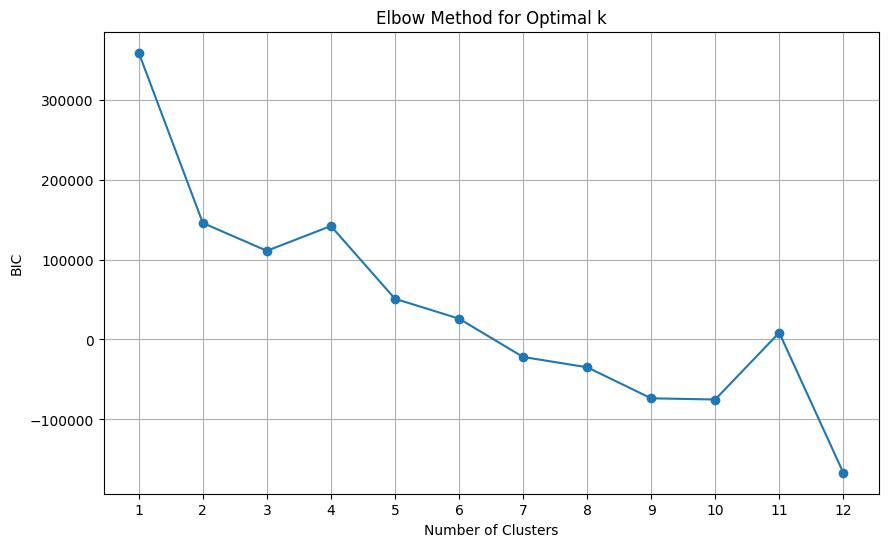

In [35]:
k_values = np.arange(1,13)
BIC = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_pca)
    BIC.append(gmm.bic(df_pca))

plt.figure(figsize=(10, 6))
plt.plot(k_values, BIC, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.xticks(k_values)
plt.grid()
plt.show()

In [40]:
silhouette_scorer = make_scorer(silhouette_score)

param_grid = {
    'eps': [0.2, 0.3, 0.4, 0.5],
    'min_samples': [5, 10, 15]
}
dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_scorer, refit=False, cv=3)
grid_search.fit(df_pca)

# Best parameters for DBSCAN
best_eps = grid_search.best_params_['eps']
best_min_samples = grid_search.best_params_['min_samples']
print(f"Best parameters for DBSCAN: eps={best_eps}, min_samples={best_min_samples}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

Best parameters for DBSCAN: eps=0.2, min_samples=5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
# Train DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df_pca)

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(df_pca, dbscan_labels)
else:
    silhouette_dbscan = -1
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

In [ ]:
# Step 8: Visualize clustering results (KMeans, GMM, and DBSCAN)
best_k = k_values[np.argmax(silhouette_scores_kmeans)]

# KMeans clustering
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)

# DBSCAN clustering
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df_pca)

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# KMeans plot
ax[0].scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax[0].set_title('KMeans Clustering')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

# GMM plot
ax[1].scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
ax[1].set_title('GMM Clustering')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')

# DBSCAN plot
# DBSCAN labels: noise points (-1) shown in gray
colors = np.array(sns.color_palette("viridis", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)))
dbscan_colors = np.array([colors[label] if label != -1 else [0.5, 0.5, 0.5] for label in dbscan_labels])
ax[2].scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_colors, s=50)
ax[2].set_title('DBSCAN Clustering')
ax[2].set_xlabel('PCA Component 1')
ax[2].set_ylabel('PCA Component 2')

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Selecting relevant features for clustering
relevant_columns = [
    "Restaurant_latitude",
    "Restaurant_longitude",
    "Delivery_location_latitude",
    "Delivery_location_longitude",
    "Time_taken (min)",
]

# Extract the relevant subset of df
df_subset = df[relevant_columns]

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
df_imputed = imputer.fit_transform(df_subset)

# Normalize the df for clustering
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_imputed)

# Confirm preprocessing completion by checking the shape of normalized df
df_normalized.shape




from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_values = range(1, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=inertia, marker='o')
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.grid(True)
plt.show()






# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score # Import silhouette_score

# Load the dataset
data = pd.read_csv('/content/Zomato Dataset.csv')
X = data[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_taken (min)']]

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_imputed)

# Dimensionality reduction for visualization
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Number of components left after PCA:", pca.n_components_)
print("PCA Components (weights for each feature):\n", pca.components_)

# ----- KMeans -----
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

# ----- DBSCAN -----
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# ----- Gaussian Mixture -----
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# ----- Evaluation -----
# Calculate Silhouette Score for each clustering method
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Gaussian Mixture Silhouette Score: {gmm_silhouette}")

# ----- Visualization -----
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# KMeans clustering result
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax[0].set_title('KMeans Clustering')

# DBSCAN clustering result
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
ax[1].set_title('DBSCAN Clustering')

# Gaussian Mixture Model result
ax[2].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
ax[2].set_title('Gaussian Mixture Model')

plt.show()